Q: I'm working with Boucicault's The Colleen Bawn. Thematically, I'm trying to understand the play as it pertains to a vision of Irishness as pastoral and rural. I'm interested in the romantic language and parts of the body mentioned in certain lines (eyes, hair, hands, and especially the loaded meanings in the word 'heart') . My hypothesis is that 'heart' has a lot of connotative meanings in relation to either romance or identity, and these meanings might pin down these pastoral images of Irishness. 

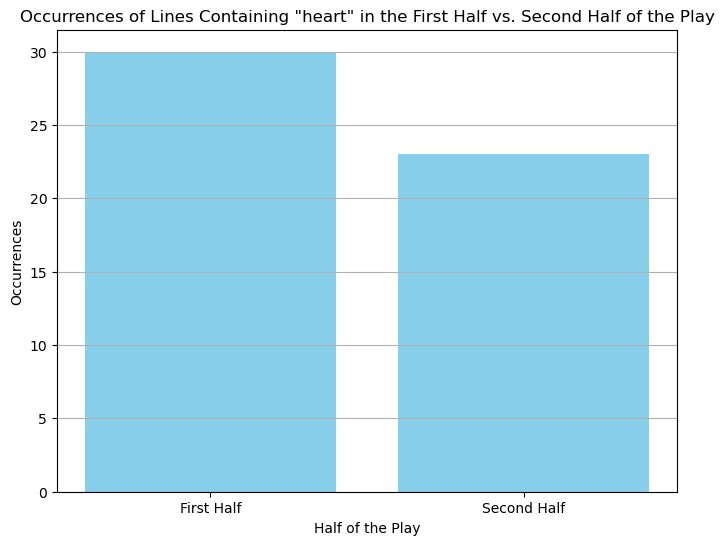

In [3]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Load the text
with open('../data/3_main_boucicault-dion-and-griffin-gerald_the-colleen-bawn.allchunks_cleaned.txt', 'r', encoding='utf-8') as file:
    text = file.read()

# Split the text into two halves
total_lines = text.split('\n')
mid_point = len(total_lines) // 2
first_half = total_lines[:mid_point]
second_half = total_lines[mid_point:]

# Sentiment analysis using NLTK's SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Analyze sentiment for lines containing the word 'heart' in the first half
sentiments_first_half = []
for line in first_half:
    if 'heart' in line.lower():
        sentiment_score = sid.polarity_scores(line)
        sentiments_first_half.append(sentiment_score['compound'])

# Analyze sentiment for lines containing the word 'heart' in the second half
sentiments_second_half = []
for line in second_half:
    if 'heart' in line.lower():
        sentiment_score = sid.polarity_scores(line)
        sentiments_second_half.append(sentiment_score['compound'])

# Calculate the total counts
count_first_half = len(sentiments_first_half)
count_second_half = len(sentiments_second_half)

# Plotting the sentiment counts
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.bar(['First Half', 'Second Half'], [count_first_half, count_second_half], color='skyblue')
plt.title('Occurrences of Lines Containing "heart" in the First Half vs. Second Half of the Play')
plt.xlabel('Half of the Play')
plt.ylabel('Occurrences')
plt.grid(axis='y')
plt.show()

Top Positive Words Within Lines Containing 'heart':
love: 18
beautiful: 2
happy: 2
joy: 1


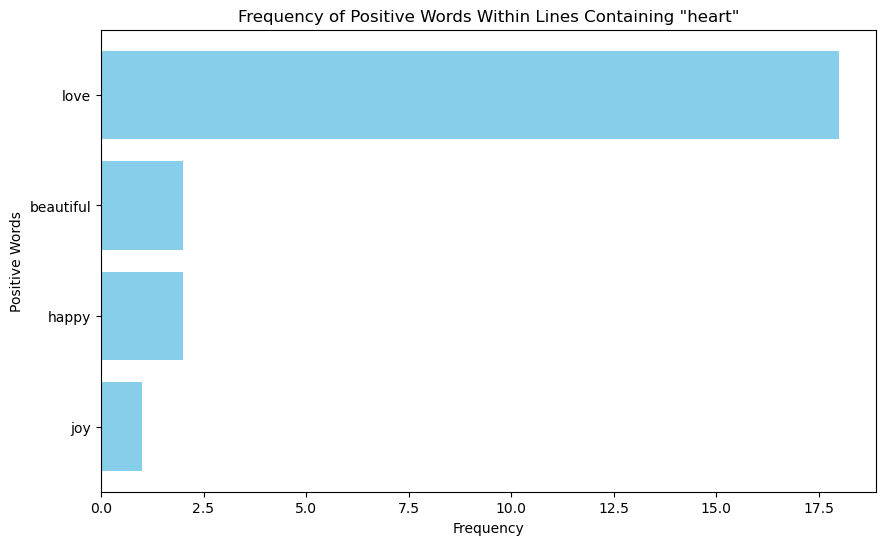

In [5]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

# Load the text
with open('../data/3_main_boucicault-dion-and-griffin-gerald_the-colleen-bawn.allchunks_cleaned.txt', 'r', encoding='utf-8') as file:
    text = file.read()

# Tokenization
lines = text.split('\n')

# Function to preprocess and tokenize a line
def preprocess_line(line):
    words = word_tokenize(line)
    words = [word.lower() for word in words if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    return words

# Find lines containing the word 'heart' and preprocess them
heart_lines = [line for line in lines if 'heart' in line.lower()]
preprocessed_lines = [preprocess_line(line) for line in heart_lines]

# Flatten the list of preprocessed words
words = [word for line in preprocessed_lines for word in line]

# Count word frequencies
word_freq = Counter(words)

# List of positive words (you can expand this list)
positive_words = ["love", "joy", "happy", "beautiful", "wonderful", "amazing", "delight", "bliss", "charm"]

# Calculate positive word frequencies within lines containing 'heart'
positive_word_freq = {word: freq for word, freq in word_freq.items() if word in positive_words}

# Sort by frequency
positive_word_freq = dict(sorted(positive_word_freq.items(), key=lambda item: item[1], reverse=True))

# Display the top positively associated words
print("Top Positive Words Within Lines Containing 'heart':")
for word, freq in positive_word_freq.items():
    print(f"{word}: {freq}")

import matplotlib.pyplot as plt

# Display the top N positively associated words
top_n = 10
top_positive_words = list(positive_word_freq.keys())[:top_n]
word_freq_values = list(positive_word_freq.values())[:top_n]

# Plotting the data
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_positive_words)), word_freq_values, color='skyblue')
plt.yticks(range(len(top_positive_words)), top_positive_words)
plt.xlabel('Frequency')
plt.ylabel('Positive Words')
plt.title('Frequency of Positive Words Within Lines Containing "heart"')
plt.gca().invert_yaxis()  # Invert y-axis to display top words at the top
plt.show()

I was hoping to see how the positive or negative sentiment was calculated and what words or groupings of words made the line read either positive or negative. I'm also hoping to see whether there is a way to measure connotation (I know that might be out there) and whether lines with the word 'heart' connote identity (ex: my Irish heart) or romance (ex: that heart beats alone for me) or maybe a combination or different tone altogether.

In [9]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from nltk import word_tokenize
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')

# Load the text
with open('../data/3_main_boucicault-dion-and-griffin-gerald_the-colleen-bawn.allchunks_cleaned.txt', 'r', encoding='utf-8') as file:
    text = file.read()

# Split the text into sentences
sentences = nltk.sent_tokenize(text)

# Filter sentences that contain the word 'heart'
heart_sentences = [sentence for sentence in sentences if 'heart' in word_tokenize(sentence.lower())]

# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Analyze sentiment of sentences containing 'heart'
sentiment_scores = [sia.polarity_scores(sentence) for sentence in heart_sentences]

# Define function to categorize sentiment based on compound score
def categorize_sentiment(score):
    if score > 0.05:
        return 'positive'
    elif score < -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply categorization
categorized_sentiments = [categorize_sentiment(score['compound']) for score in sentiment_scores]

# Extract features (words) and their frequency for each sentiment category
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(heart_sentences)
words = vectorizer.get_feature_names_out()

word_counts = X.sum(axis=0)

# Initialize dictionary for word counts by sentiment category
word_counts_by_sentiment = {'positive': {}, 'negative': {}, 'neutral': {}}

for i, sentence in enumerate(heart_sentences):
    category = categorized_sentiments[i]
    for word in word_tokenize(sentence.lower()):
        if word in stopwords.words('english') or not word.isalpha():
            continue
        if word in word_counts_by_sentiment[category]:
            word_counts_by_sentiment[category][word] += 1
        else:
            word_counts_by_sentiment[category][word] = 1

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/tomvannuenen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tomvannuenen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
# Display results for each sentiment category
for sentiment in word_counts_by_sentiment:
    print(f"Most indicative words for {sentiment} sentiment:", sorted(word_counts_by_sentiment[sentiment].items(), key=lambda item: item[1], reverse=True)[:10])


Most indicative words for positive sentiment: [('heart', 17), ('love', 7), ('ye', 6), ('upon', 3), ('may', 3), ('niver', 3), ('good', 3), ('dan', 3), ('ses', 3), ('c', 2)]
Most indicative words for negative sentiment: [('heart', 15), ('hard', 3), ('eily', 3), ('broke', 2), ('mother', 2), ('way', 2), ('longer', 2), ('rival', 2), ('love', 2), ('foolish', 2)]
Most indicative words for neutral sentiment: [('heart', 13), ('smaller', 2), ('every', 2), ('kyrle', 2), ('way', 2), ('oh', 2), ('could', 2), ('sin', 1), ('time', 1), ('sir', 1)]


In [11]:
# Analyze connotations regarding identity and romance
identity_keywords = ['irish', 'ireland', 'native', 'home', 'country']
romance_keywords = ['love', 'loves', 'loved', 'loving', 'beloved', 'dear', 'darling', 'sweetheart']

identity_count = sum(any(keyword in word_tokenize(sentence.lower()) for keyword in identity_keywords) for sentence in heart_sentences)
romance_count = sum(any(keyword in word_tokenize(sentence.lower()) for keyword in romance_keywords) for sentence in heart_sentences)

print("Identity-related 'heart' mentions:", identity_count)
print("Romance-related 'heart' mentions:", romance_count)


Identity-related 'heart' mentions: 3
Romance-related 'heart' mentions: 11


I'd like to see if the usage of "heart" in these two contexts changes across the play

In [20]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk import word_tokenize
from nltk.corpus import stopwords
import re

nltk.download('punkt')
nltk.download('stopwords')

# Load the text
with open('../data/3_main_boucicault-dion-and-griffin-gerald_the-colleen-bawn.allchunks_cleaned.txt', 'r', encoding='utf-8') as file:
    text = file.read()

# Example of dividing text into acts or scenes (adjust the regex according to your text structure)
segments = re.split(r'ACT [IVX]+', text)  # Splits on "ACT" followed by a roman numeral

# Prepare to analyze each segment
sia = SentimentIntensityAnalyzer()
identity_keywords = ['irish', 'ireland', 'native', 'home', 'country']
romance_keywords = ['love', 'loves', 'loved', 'loving', 'beloved', 'dear', 'darling', 'sweetheart']
results = []

for i, segment in enumerate(segments):
    # Split the segment into sentences and filter by 'heart'
    sentences = nltk.sent_tokenize(segment)
    heart_sentences = [sentence for sentence in sentences if 'heart' in word_tokenize(sentence.lower())]
    identity_count = sum(any(keyword in word_tokenize(sentence.lower()) for keyword in identity_keywords) for sentence in heart_sentences)
    romance_count = sum(any(keyword in word_tokenize(sentence.lower()) for keyword in romance_keywords) for sentence in heart_sentences)
    
    # Analyze sentiment of 'heart' sentences in this segment
    sentiment_scores = [sia.polarity_scores(sentence) for sentence in heart_sentences]
    sentiment_summary = {
        'positive': sum(1 for score in sentiment_scores if score['compound'] > 0.05),
        'neutral': sum(1 for score in sentiment_scores if -0.05 <= score['compound'] <= 0.05),
        'negative': sum(1 for score in sentiment_scores if score['compound'] < -0.05)
    }
    
    # Append results for this segment
    results.append({
        'act_number': i + 1,
        'identity_mentions': identity_count,
        'romance_mentions': romance_count,
        'sentiments': sentiment_summary
    })

# Display the results
for result in results:
    print(f"Act {result['act_number']}: Identity-related 'heart' mentions - {result['identity_mentions']}, "
          f"Romance-related 'heart' mentions - {result['romance_mentions']}, Sentiments - {result['sentiments']}")


Act 1: Identity-related 'heart' mentions - 0, Romance-related 'heart' mentions - 0, Sentiments - {'positive': 0, 'neutral': 0, 'negative': 0}
Act 2: Identity-related 'heart' mentions - 2, Romance-related 'heart' mentions - 3, Sentiments - {'positive': 7, 'neutral': 6, 'negative': 3}
Act 3: Identity-related 'heart' mentions - 1, Romance-related 'heart' mentions - 4, Sentiments - {'positive': 5, 'neutral': 2, 'negative': 6}
Act 4: Identity-related 'heart' mentions - 0, Romance-related 'heart' mentions - 4, Sentiments - {'positive': 5, 'neutral': 4, 'negative': 6}


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/tomvannuenen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tomvannuenen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
